In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)


In [ ]:
df=pd.read_csv("/content/final_clean.csv")

In [ ]:
df

,Unnamed: 0,Gender,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Type of Travel_Personal,Customer Type_Returning
0,0,1,48,2.0,821,2,5.0,3.0,3.0,4.0,...,2.0,5.0,5.0,5.0,3.0,5.0,5.0,0,False,False
1,1,0,35,2.0,821,26,32.5,2.0,2.0,3.0,...,5.0,5.0,3.0,5.0,2.0,5.0,5.0,1,False,True
2,2,1,41,2.0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,5.0,3.0,4.0,3.0,3.0,1,False,True
3,3,1,50,2.0,1905,0,0.0,2.0,2.0,3.0,...,5.0,4.0,4.0,5.0,2.0,5.0,5.0,1,False,True
4,4,0,49,2.0,3470,0,1.0,3.0,3.0,3.0,...,4.0,5.0,4.0,3.0,3.0,3.0,3.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,1,28,1.0,447,2,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,0,True,True
129876,129876,1,41,1.0,308,0,0.0,5.0,3.0,5.0,...,5.0,2.0,2.0,4.0,3.0,2.0,5.0,0,True,True
129877,129877,1,42,1.0,337,6,14.0,5.0,2.0,4.0,...,4.0,3.0,3.0,4.0,2.0,3.0,5.0,0,True,True
129878,129878,1,50,1.0,337,30,22.0,4.0,4.0,3.0,...,5.0,3.0,3.0,4.0,5.0,3.0,5.0,1,True,True


In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
df

,Gender,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Type of Travel_Personal,Customer Type_Returning
0,1,48,2.0,821,2,5.0,3.0,3.0,4.0,3.0,...,2.0,5.0,5.0,5.0,3.0,5.0,5.0,0,False,False
1,0,35,2.0,821,26,32.5,2.0,2.0,3.0,5.0,...,5.0,5.0,3.0,5.0,2.0,5.0,5.0,1,False,True
2,1,41,2.0,853,0,0.0,4.0,4.0,4.0,5.0,...,3.0,5.0,5.0,3.0,4.0,3.0,3.0,1,False,True
3,1,50,2.0,1905,0,0.0,2.0,2.0,3.0,4.0,...,5.0,4.0,4.0,5.0,2.0,5.0,5.0,1,False,True
4,0,49,2.0,3470,0,1.0,3.0,3.0,3.0,5.0,...,4.0,5.0,4.0,3.0,3.0,3.0,3.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1.0,447,2,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,0,True,True
129876,1,41,1.0,308,0,0.0,5.0,3.0,5.0,3.0,...,5.0,2.0,2.0,4.0,3.0,2.0,5.0,0,True,True
129877,1,42,1.0,337,6,14.0,5.0,2.0,4.0,2.0,...,4.0,3.0,3.0,4.0,2.0,3.0,5.0,0,True,True
129878,1,50,1.0,337,30,22.0,4.0,4.0,3.0,4.0,...,5.0,3.0,3.0,4.0,5.0,3.0,5.0,1,True,True


In [ ]:
# Separate features & target
X = df.drop("Satisfaction", axis=1)
y = df["Satisfaction"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy :", rf.score(X_test, y_test))

Train Accuracy: 0.9543135971666153
Test Accuracy : 0.9519171542962734


In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9519171542962734

Confusion Matrix:
 [[14194   498]
 [  751 10533]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14692
           1       0.95      0.93      0.94     11284

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



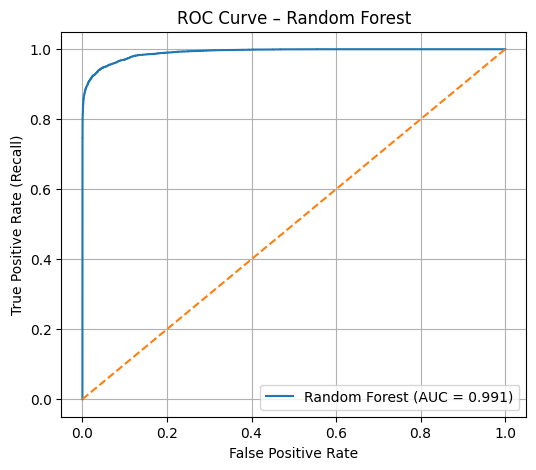

In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
joblib.dump("Airline_pipeline.pkl")

NameError: name 'pipe' is not defined

In [ ]:
joblib.dump(X.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']

In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
#done Cross-Validation

CV Scores: [0.95106107 0.95202348 0.94788509 0.95014677 0.94826756]
Mean CV Accuracy: 0.9498767938748374
